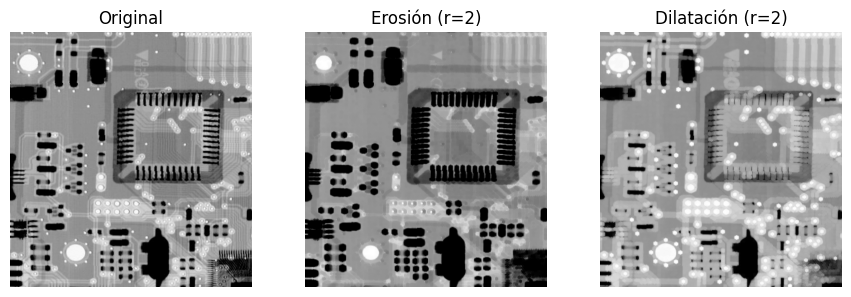

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar en escala de grises
img = cv2.imread("board_secion.tiff", cv2.IMREAD_GRAYSCALE)

# 2) Elemento estructurante: disco plano de radio 2 (5x5)
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# 3) Morfología en escala de grises
eroded  = cv2.erode(img,  se, iterations=1)   # erosión
dilated = cv2.dilate(img, se, iterations=1)   # dilatación

# 4) (Opcional) Mostrar
plt.figure(figsize=(9,3))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');     plt.title("Original");   plt.axis('off')
plt.subplot(1,3,2); plt.imshow(eroded, cmap='gray');  plt.title("Erosión (r=2)");  plt.axis('off')
plt.subplot(1,3,3); plt.imshow(dilated, cmap='gray'); plt.title("Dilatación (r=2)"); plt.axis('off')
plt.tight_layout(); plt.show()

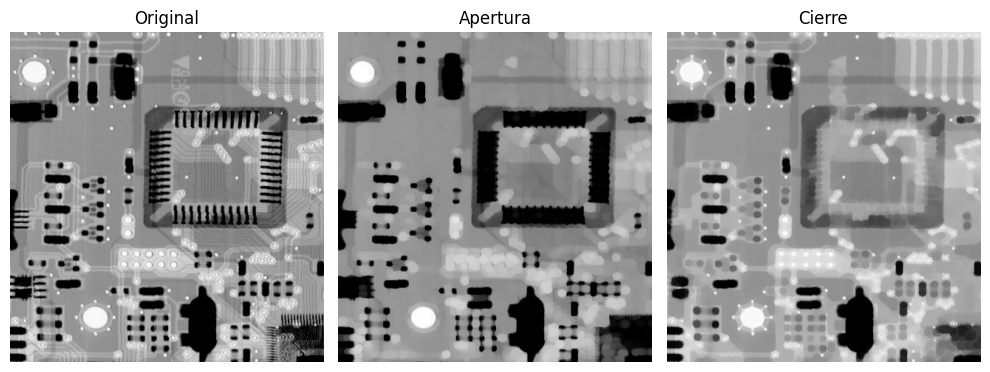

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar en escala de grises
img = cv2.imread("board_secion.tiff", cv2.IMREAD_GRAYSCALE)

# 2) Elemento estructurante: disco plano de radio 2 (5x5)
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))

# 3) Operaciones morfológicas en escala de grises
eroded   = cv2.erode(img,  se, iterations=1)             # erosión
dilated  = cv2.dilate(img, se, iterations=1)             # dilatación
opened   = cv2.morphologyEx(img, cv2.MORPH_OPEN,  se)    # apertura
closed   = cv2.morphologyEx(img, cv2.MORPH_CLOSE, se)    # cierre

# 4) Mostrar resultados
plt.figure(figsize=(10,5))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray');     plt.title("Original");   plt.axis('off')
plt.subplot(1,3,2); plt.imshow(opened, cmap='gray');  plt.title("Apertura");   plt.axis('off')
plt.subplot(1,3,3); plt.imshow(closed, cmap='gray');  plt.title("Cierre");     plt.axis('off')
plt.tight_layout(); plt.show()


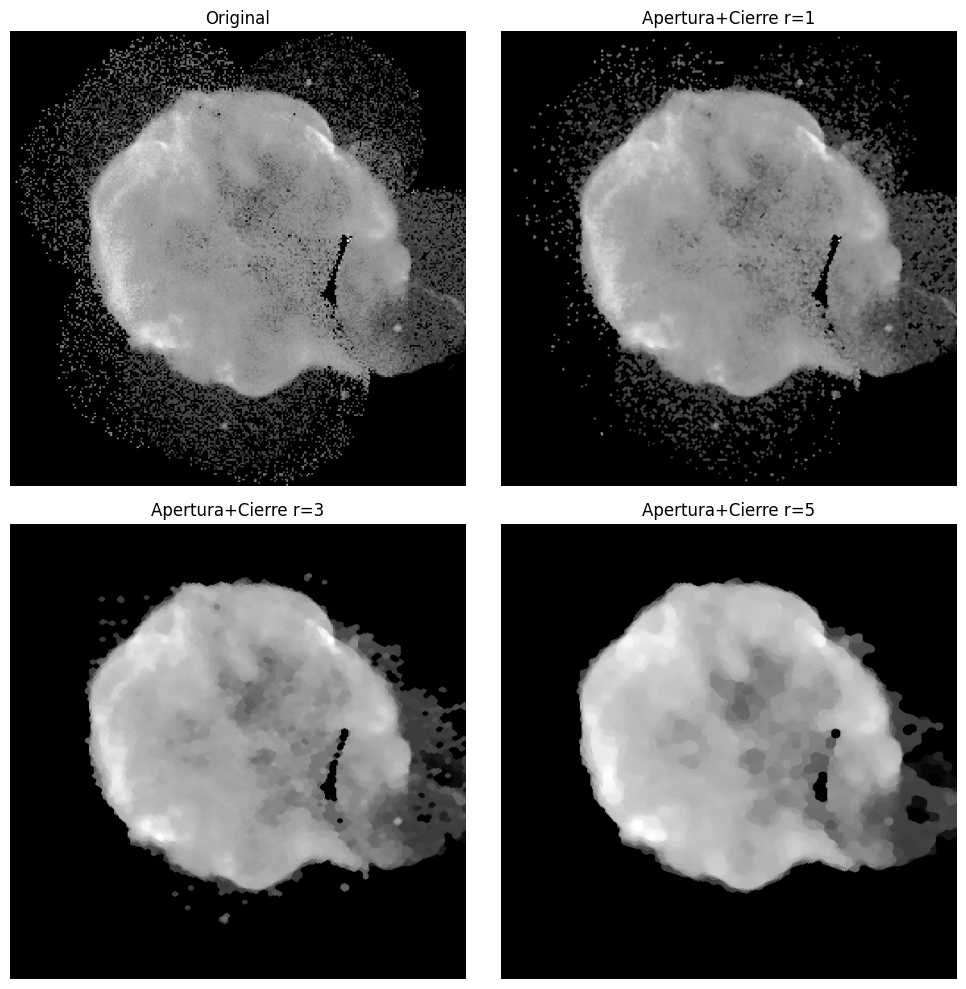

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar la imagen en escala de grises
img = cv2.imread("xray.tif", cv2.IMREAD_GRAYSCALE)

# 2) Función para hacer apertura seguida de cierre
def open_close(img, r):
    se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2*r+1, 2*r+1))
    opened = cv2.morphologyEx(img, cv2.MORPH_OPEN, se)
    closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, se)
    return closed

# 3) Aplicar con diferentes radios
proc_r1 = open_close(img, 1)
proc_r3 = open_close(img, 3)
proc_r5 = open_close(img, 5)

# 4) Mostrar resultados
plt.figure(figsize=(10,10))

plt.subplot(2,2,1); plt.imshow(img, cmap='gray');     plt.title("Original"); plt.axis('off')
plt.subplot(2,2,2); plt.imshow(proc_r1, cmap='gray'); plt.title("Apertura+Cierre r=1"); plt.axis('off')
plt.subplot(2,2,3); plt.imshow(proc_r3, cmap='gray'); plt.title("Apertura+Cierre r=3"); plt.axis('off')
plt.subplot(2,2,4); plt.imshow(proc_r5, cmap='gray'); plt.title("Apertura+Cierre r=5"); plt.axis('off')

plt.tight_layout()
plt.show()


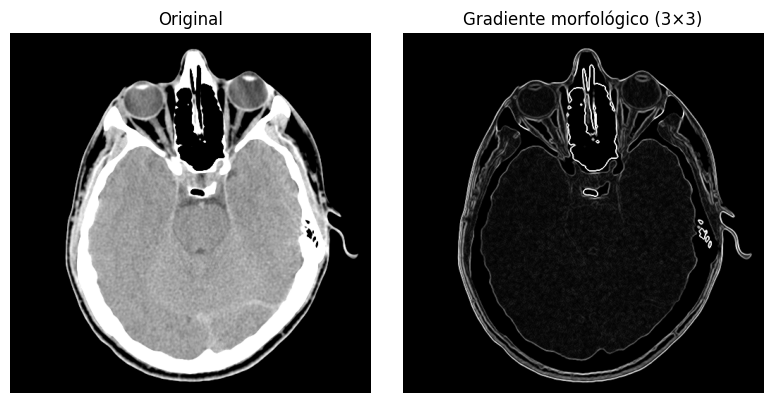

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1) Cargar en escala de grises
img = cv2.imread("cerebro.tif", cv2.IMREAD_GRAYSCALE)

# 2) EE 3×3 (aprox. disco / elipse)
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

# 3) Gradiente morfológico = dilatación - erosión
grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, se)

# 4) Mostrar 1x2
plt.figure(figsize=(8,4))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray');  plt.title("Original");  plt.axis('off')
plt.subplot(1,2,2); plt.imshow(grad, cmap='gray'); plt.title("Gradiente morfológico (3×3)"); plt.axis('off')
plt.tight_layout(); plt.show()

# (Opcional) Guardar
# cv2.imwrite("cerebro_gradiente_3x3.png", grad)
